<a href="https://colab.research.google.com/github/TemsyToto/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/TemsyChen_LS_DS_122_Chi2_Tests_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Practice Chi-square Tests

###Dataset description:

Slasher movies thrill audiences by portraying a lone antagonist (typically male) who attacks innocent victims with extreme violence and without apparent motive. However, this exciting (if gory) subgenre of horror film is criticized by those who view the violence as being used to “punish” female characters who engage in sexual activity during the film. To test this claim, study authors randomly sampled 50 North American slasher films released from 1960 to 2009 and coded the 485 characters appearing in them as being male or female, involved in sexual activity or not, and if they survived the film or not1. The data appears in the Slasher.csv dataset. In this project, we are going to answer a slightly simpler question: Are female characters in slasher films more likely to be "murdered" than male characters?

Source: A. Welsh (2010). "On the Perils of Living Dangerously in the Slasher Horror Film: Gender Differences in the Association Between Sexual Activity and Survival," Sex Roles, Vol. 62 pp. 762-773

You can find the Slasher.csv file here:

<https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Slasher.csv>





### 1) Load the Slasher.csv dataset in a new dataframe.



In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Slasher.csv')

###2) Display the top 5 rows of the dataframe to take a look at the variable names and values.

In [2]:
df.head()

,ID,Gender,Activity,Survival
0,1,1,1,1
1,2,1,1,1
2,3,1,1,1
3,4,1,1,1
4,5,1,1,1


The variable codes are:

ID = Character ID

Gender = Character gender.  0 = female, 1 = male

Activity = Character was portrayed as engaged in sexual activity.  0 = no, 1 = yes

Survival = Character survival in the film. 0 = did not survive, 1 = survived

###3) Calculate the frequency and relative frequency of male and female characters in this set of slasher films.  Describe your results in a sentence or two.

In [3]:
print("Frequency of Male/Female characters\n\n", pd.crosstab(df['Gender'], columns="columns"),"\n")
print("Relative frequency of Male/Female characters\n\n", pd.crosstab(df['Gender'], columns='columns',normalize=True)*100)

Frequency of Male/Female characters

 col_0   columns
Gender         
0           263
1           222 

Relative frequency of Male/Female characters

 col_0     columns
Gender           
0       54.226804
1       45.773196


Describe your results here:
Females make up 54% of characters in slasher films. 
Males make up 46%.

###4) Calculate the frequency and relative frequency of character survival in this set of slasher films.  Describe your results in a sentence or two.

Describe your results here: **82% of characters do not survive. 18% survive.**

In [4]:
print("Frequency of character survival\n\n", pd.crosstab(df['Survival'], columns="columns"),"\n")
print("Relative frequency of character survival\n\n", pd.crosstab(df['Survival'], columns='columns',normalize=True)*100)

Frequency of character survival

 col_0     columns
Survival         
0             400
1              85 

Relative frequency of character survival

 col_0       columns
Survival           
0         82.474227
1         17.525773


###5) Calculate the joint distribution of character sex and movie survival. Add the table margins.  

Hint: If you are working off of the in-class examples, it will be helpful to include character sex as the index variable. 

Describe your results in a sentence or two.

**Both females and males died more often than survived in slasher films.**

In [5]:
print(pd.crosstab(df['Gender'],df['Survival'],margins=True))

Survival    0   1  All
Gender                
0         228  35  263
1         172  50  222
All       400  85  485


###6) Calculate the distribution of survival conditional on character sex.
Hint: If you are working off of the in-class examples, it will be helpful to include character sex as the index variable. 

Describe your results in a sentence or two. 

**Relatively more females died than males. 87% females died, while 77% of males died.**

In [6]:
#The first time I did normalize=True and got this. I see now that this takes the percentage of each quadrant 
#from the entire population. What I need to get is the percentage of deaths by gender.

print(pd.crosstab(df['Gender'],df['Survival'],margins=True,normalize=True)*100)

Survival          0          1         All
Gender                                    
0         47.010309   7.216495   54.226804
1         35.463918  10.309278   45.773196
All       82.474227  17.525773  100.000000


In [7]:
#Here is the fix to the above problem. Now percentage of deaths of females is 
#only from the female population, not both male and female.

print(pd.crosstab(df['Gender'],df['Survival'],margins=True,normalize='index')*100)

Survival          0          1
Gender                        
0         86.692015  13.307985
1         77.477477  22.522523
All       82.474227  17.525773


###7) Identify the appropriate null and alternative hypotheses to test for a statistically significant relationship between character sex and survival. 

**Ho:** There is no association between character sex and survival

**Ha:** There is an association between character sex and survival

### 8) Perform the chi-square test above using `stats.chi2_contingency()` and output the p-value.


In [8]:
from scipy.stats import chi2_contingency

g, p, dof, exptd = chi2_contingency(pd.crosstab(df['Gender'],df['Survival']))

print("p-value:", p)

p-value: 0.011104692591139975


### 9) Interpret your p-value in 8) at the 0.05 significance level, and summarize your results in a sentence or two.

Describe your results in a sentence or two.

**The p-value is below the significance level, so I reject the null. There is an association between character sex and survival.**

### 10) Create a side-by-side bar plot to illuatrate the relationship between character sex and survival in Slasher movies.  Sum up your overall results in a sentence or two.

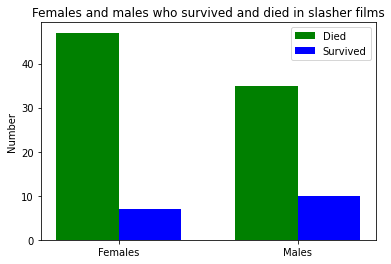

In [9]:
import matplotlib.pyplot as plt
import numpy as np


# Number of sexes
N = 2

Died = (47, 35) # Number that died in slasher films
Survived = (7, 10) #Number that survived in slasher films

#This is more graphical stuff
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

#Create the plot
fig, ax = plt.subplots()
rects1 = ax.bar(ind, Died, width, color='g') #bars for died
rects2 = ax.bar(ind + width, Survived, width, color='b') #bars for survived

# add some text for labels, title and axes ticks
ax.set_ylabel('Number')
ax.set_title('Females and males who survived and died in slasher films')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Females', 'Males'))

ax.legend((rects1[0], rects2[0]), ('Died', 'Survived'));

Sum up your results in a sentence or two.

**Although in both groups, more people died than survived, females died more frequently than their male counterparts did.**

## Stretch Goals:

###1. Explore the concept of an odds ratio

Another way to quantify the relationship between two categorical variables is by calculating the odds ration, which is the ratio of the odds of an event happening in one group to the odds of the event happening in another group.

[Lots more about the odds ratio](https://en.wikipedia.org/wiki/Odds_ratio).

We can use Python to calculate the odds of surviving a slaser movie for female compared to male characters.

You can find more information about calculating the odds ratio for a 2x2 table in Python [here](https://www.statsmodels.org/stable/contingency_tables.html).  Scroll down to the section labeled "A Single 2x2 Table".

Calculate the odds ratio comparing the odds of movie survival in female compared to male characters.  Interpret what this number tells you about the likelihood of male and female characters surviving the film.


In [10]:
import statsmodels.api as sm

# table = pd.crosstab(df['Gender'],df['Survival']

table = np.asarray([[228, 35], [172, 50]])

t22 = sm.stats.Table2x2(table)

print(t22.summary())

# print(df2.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


               Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        1.894       1.177 3.046   0.008
Log odds ratio    0.639 0.242 0.163 1.114   0.008
Risk ratio        1.119       1.027 1.219   0.010
Log risk ratio    0.112 0.044 0.027 0.198   0.010
-------------------------------------------------


Sum up your results in a sentence or two.
----
The risk ratio is 1.119, so a female character is 12% more likely to be killed than a male character in a slasher film.

The odds ratio is 1.89, so the odds are 1.89 times more likely that a woman will be murdered more than a man in a slasher film.



### 2. Learn about Simpson's Paradox

[Simpson's Paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox#:~:text=Simpson's%20paradox%2C%20which%20goes%20by,when%20these%20groups%20are%20combined.) occurs when a trend that appears in separate groups disappears or reverses when those groups are combined.  

Create a scenario where Hopsital A has a lower overall mortality rate than Hospital B but has a higher mortality rate if cases are separated into two groups: high risk and low risk.


I'm having a hard time with this one. I can't even get to the point of making a table and then making a crosstab of it so that I can test the Simpson's Paradox. I'll come back to this if I have time.

In [42]:
df = pd.DataFrame({'low risk':  [3, 19],
        'high risk': [6, 10]},
        index=['hospital a','hospital b'])

df


,low risk,high risk
hospital a,3,6
hospital b,19,10


In [51]:
lowrisk = np.array([3,6])
highrisk = np.array([19,10])

pd.crosstab([a, b], rownames=['low risk','high risk'], columns=['low risk', 'high risk'])

,col_0,low risk
,col_1,high risk
low risk,high risk,
3,19,1
6,10,1


In [54]:
# raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 
#         'company': ['infantry', 'infantry', 'cavalry', 'cavalry', 'infantry', 'infantry', 'cavalry', 'cavalry','infantry', 'infantry', 'cavalry', 'cavalry'], 
#         'experience': ['veteran', 'rookie', 'veteran', 'rookie', 'veteran', 'rookie', 'veteran', 'rookie','veteran', 'rookie', 'veteran', 'rookie'],
#         'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'], 
#         'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
#         'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}
# df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'experience', 'name', 'preTestScore', 'postTestScore'])
# df

raw_data = {'hospital a': [3,19],
            'hospital b': [19,10]}
df = pd.DataFrame(raw_data, columns = ['low risk', 'high risk'])


Empty DataFrame
Columns: [low risk, high risk]
Index: []


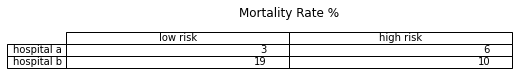

In [39]:

fig = plt.figure(figsize = (8, 1))
ax = fig.add_subplot(111)

ax.table(cellText = df.values,
          rowLabels = df.index,
          colLabels = df.columns,
          loc = "center"
         )
ax.set_title("Mortality Rate %")

ax.axis("off");

Sum up your results in a sentence or two.